## impedance simulation:

In [1]:
from scipy.special import *
from math import *
import numpy as np  
from scipy.constants import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def my_range(start,stop,step):
    while start <= stop:
        yield start
        start += step

2.067525e-13
8.63945468681e-10
74.8223681472
11.9083497445
Q_int = 117647.058824
Q_int = 117627.930869
Q_ext = 2292.05121736
7424213.65564


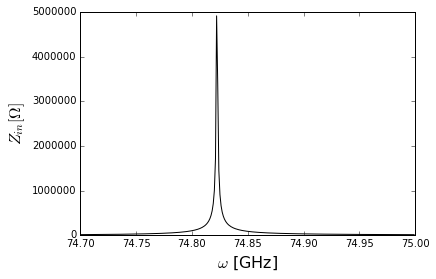

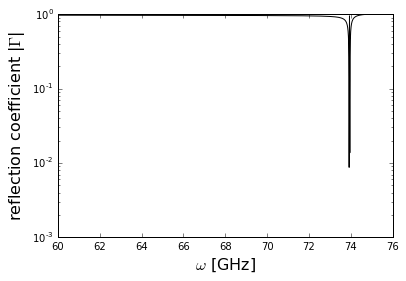

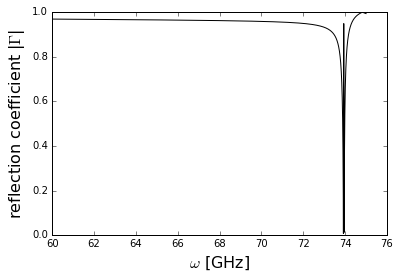

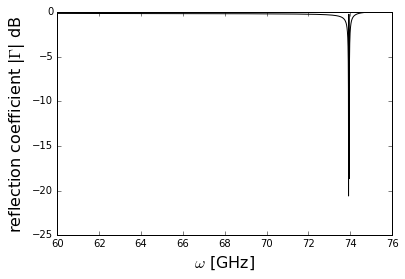

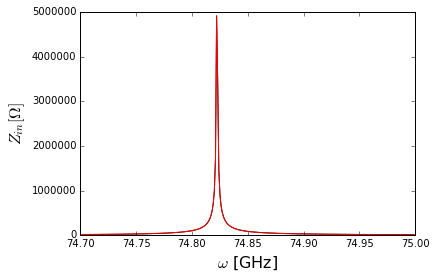

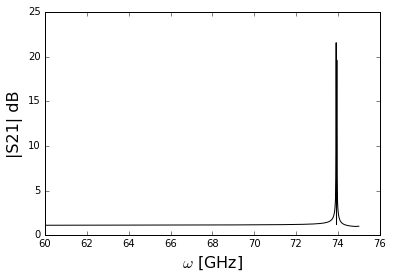

In [4]:
from scipy.special import *
from math import *
import numpy as np  
from scipy.constants import *
import matplotlib.pyplot as plt

%matplotlib inline

Cc = 5.*10**(-15)
C_l = 1.65402*10**(-10)
L_l = 4.2634*10**(-7)
Z_0 = 50.
l_res = 2500e-6



C = C_l*l_res/2
L = 8.*L_l*l_res/(np.pi**2.)
R2 = 500000000.



print C
print L


wres = 1/np.sqrt(L*C)
fres = wres/(2*np.pi)
print wres*10**(-9) 
print fres*10**(-9)

eff = 6.45
tan = 8.5*10**(-6)
alpha =np.pi*np.sqrt(eff)*fres*tan/c
R = Z_0/(alpha*l_res)

wresc = 1/np.sqrt(L*(C+Cc))
R_star = (1+(wresc*Cc*Z_0)**2.)/(wresc**2.*Cc**2.*Z_0)
Q_ext = wresc*(Cc+C)*R_star

Q_int = 1/tan
print 'Q_int =', Q_int 
print 'Q_int =', wres*(Cc+C)*R
print 'Q_ext =', Q_ext

print R

def Z_in(w):
    return np.abs(1./(1.j*w*Cc)+1./(1./R+1./(1.j*w*L)+1.j*w*C))


def Z_in2(w):
    return np.abs(1/(1/R+1/(1j*w*L)+1j*w*C))

def absZ_in(w):
    return np.sqrt(R**2./(1+(R*w*C)**2.*(1-1/(w**2.*L*C))**2.))

w1 = np.arange(74.7,75.,0.001)

def tau(w):
    return np.abs((Z_in(w)-Z_0)/(Z_in(w)+Z_0))


def taudB(w):
    return 10*np.log10(abs((Z_in(w)-Z_0)/(Z_in(w)+Z_0)))

plt.plot(w1,Z_in(w1*10**(9)),'k')
plt.xlabel('$\omega$ [GHz]', fontsize = 16 )
plt.ylabel('$Z_{in} [\Omega]$', fontsize = 16 )
plt.show()

w2 = np.arange(60.,75.,0.001)
plt.plot(w2,tau(w2*10**(9)),'k')
plt.xlabel('$\omega$ [GHz]', fontsize = 16 )
plt.yscale('log')
plt.ylabel('reflection coefficient |$\Gamma$|', fontsize = 16 )
plt.show()

plt.plot(w2,tau(w2*10**(9)),'k')
plt.xlabel('$\omega$ [GHz]', fontsize = 16 )
plt.ylabel('reflection coefficient |$\Gamma$|', fontsize = 16 )
plt.show()

plt.plot(w2,taudB(w2*10**(9)),'k')
plt.xlabel('$\omega$ [GHz]', fontsize = 16 )
plt.ylabel('reflection coefficient |$\Gamma$| dB', fontsize = 16 )
plt.show()



plt.plot(w1,Z_in(w1*10**(9)),'k')
plt.plot(w1,absZ_in(w1*10**(9)),'k', color = 'red')
plt.xlabel('$\omega$ [GHz]', fontsize = 16 )
plt.ylabel('$Z_{in} [\Omega]$', fontsize = 16 )
plt.show()
#transmission:

def S21(w):
    return 1-10*np.log10(abs((Z_in(w)-Z_0)/(Z_in(w)+Z_0)))

plt.plot(w2,S21(w2*10**(9)),'k')
plt.xlabel('$\omega$ [GHz]', fontsize = 16 )
plt.ylabel('|S21| dB', fontsize = 16 )
plt.show()


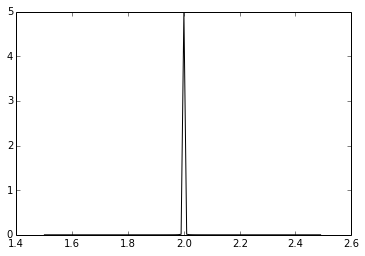

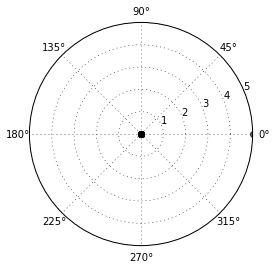

In [55]:
G = 5.
f0 = 2.e9
QL = 2000.


def A_imag(f):
    A = G/(1-2*1.j*QL*(f0-f)/f0)
    return A.imag

def A_real(f):
    A = G/(1-1.j*2*QL*(f0-f)/f0)
    return A.real

f1 = np.arange(1.5,2.5,0.01)

plt.plot(f1,A_real(f1*10**9),'k')
plt.show()
        
"""
for x in my_range(0,10.,0.01):
    plt.plot([0,A_imag(x*10**9)],[A_real(x*10**9),0],'k')
plt.show()


def reflection(f):
    rho = G/(1+4*QL**2.*((f0-f)/f0)**2.)+ G*QL*(f0-f)/(f0(1+4*QL**2.*((f0-f)/f0)**2.))*1j
    return rho

print reflection.real(3.*10**9)
"""
for x in my_range(0,10.,0.01):
    plt.polar(A_imag(x*10**9),A_real(x*10**9),marker = 'o')
plt.show()
